In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# Read in & get to know the data

In [2]:
import sys
vi = pd.read_csv("../data/processed/VNM.csv")
print("---")
print(vi.shape)
print("---")
print("This is the size of the df", sys.getsizeof(vi)/1024/1024, "MB")

---
(1200, 607)
---
This is the size of the df 6.137622833251953 MB


In [3]:
# vi.to_csv("vietnam.csv")
vi.columns=vi.columns.str.lower()

In [4]:
for i in vi.columns:
    print(i)

unnamed: 0
version
doi
a_wave
a_year
a_study
b_country
b_country_alpha
c_cow_num
c_cow_alpha
d_interview
s007
j_intdate
fw_end
fw_start
k_time_start
k_time_end
k_duration
q_mode
n_region_iso
n_region_wvs
n_region_nuts2
reg_nuts1
n_town
g_townsize
g_townsize2
h_settlement
h_urbrural
l_interviewer_number
i_psu
o1_longitude
o2_latitude
s_intlanguage
lnge_iso
e_respint
f_intprivacy
e1_literacy
w_weight
s018
s025
q1
q2
q3
q4
q5
q6
q7
q8
q9
q10
q11
q12
q13
q14
q15
q16
q17
q18
q19
q20
q21
q22
q23
q24
q25
q26
q27
q28
q29
q30
q31
q32
q33
q33_3
q34
q34_3
q35
q35_3
q36
q37
q38
q39
q40
q41
q42
q43
q44
q45
q46
q47
q48
q49
q50
q51
q52
q53
q54
q55
q56
q57
q58
q59
q60
q61
q62
q63
q64
q65
q66
q67
q68
q69
q70
q71
q72
q73
q74
q75
q76
q77
q78
q79
q80
q81
q82
q82_africanunion
q82_apec
q82_arableague
q82_asean
q82_cis
q82_cusma
q82_eco
q82_eu
q82_gulfcoop
q82_islcoop
q82_mercosur
q82_nafta
q82_oas
q82_saarc
q82_sco
q82_tlc
q82_undp
q83
q84
q85
q86
q87
q88
q89
q90
q91
q92
q93
q94
q94r
q95
q95r
q96
q96r
q97
q

In [5]:
len(vi.columns)

607

In [6]:
questionnaire=pd.read_csv('../data/raw/questionnaire_wvs.csv')
questionnaire=questionnaire.set_index(questionnaire.Column_Names)#.to_dict(orient='dict')#[questionnaire.Additional_Labels]
questionnaire=questionnaire.drop(columns="Column_Names")
ques_dict=questionnaire.to_dict()
ques_dict=ques_dict['Additional_Labels']

In [7]:
# convert the keys to lower case
ques_dict = {key.lower(): value for key, value in ques_dict.items()}
ques_dict

{'version': 'Version of Data File',
 'doi': 'Digital Object Identifier',
 'a_wave': 'Wave',
 'a_year': 'Year of survey',
 'a_study': 'Study',
 'b_country': 'ISO 3166-1 numeric country code',
 'b_country_alpha': 'ISO 3166-1 alpha-3 country code',
 'c_cow_num': 'CoW country code numeric',
 'c_cow_alpha': 'CoW country code alpha',
 'd_interview': 'Interview ID',
 's007': 'Unified respondent number',
 'j_intdate': 'Date of interview',
 'fw_end': 'Year/month of end-fieldwork',
 'fw_start': 'Year/month of start-fieldwork',
 'k_time_start': 'Start time of the interview [HH.MM]',
 'k_time_end': 'End time of the interview [HH.MM]',
 'k_duration': 'Total length of interview [minutes]',
 'q_mode': 'Mode of data collection',
 'n_region_iso': 'Region ISO 3166-2',
 'n_region_wvs': 'Region country specific',
 'n_region_nuts2': 'Region NUTS-2',
 'reg_nuts1': 'Region where the interview was conducted (NUTS-1)',
 'n_town': 'Settlement name',
 'g_townsize': 'Settlement size_8 groups',
 'g_townsize2': 'Se

    social values, attitudes & stereotypes (45 items);
    societal well-being (11 items);
    social capital, trust and organizational membership (49 items);
    economic values (6 items);
    corruption (9 items);
    migration (10 items);
    post-materialist index (6 items);
    science & technology (6 items);
    religious values (12 items);
    security (21 items);
    ethical values & norms (23 items);
    political interest and political participation (36 items);
    political culture and political regimes (25 items);
    demography (31 items).


In [8]:
# grouping columns together
initial_categ=vi.loc[:, :'q1'].columns.to_list() # initial categorical variables

social_values=vi.loc[:, 'q1':'q45'].columns.to_list()
well_being=vi.loc[:, 'q46':'q56'].columns.to_list()
social_capital_trust=vi.loc[:, 'q57':'q105'].columns.to_list()
economic_values=vi.loc[:, 'q106':'q111'].columns.to_list()
corruption=vi.loc[:, 'q112':'q120'].columns.to_list()
migration=vi.loc[:, 'q121':'q130'].columns.to_list()
security=vi.loc[:, 'q131':'q151'].columns.to_list()
post_materialist_index=vi.loc[:, 'q152':'q157'].columns.to_list()
science_tech=vi.loc[:, 'q158':'q163'].columns.to_list()
religious_values=vi.loc[:, 'q164':'q175'].columns.to_list()
ethical_values_norms=vi.loc[:, 'q176':'q198'].columns.to_list()
political_interest=vi.loc[:, 'q199':'q234'].columns.to_list()
political_culture_and_regimes=vi.loc[:, 'q235':'q259'].columns.to_list()
demography=vi.loc[:, 'q260':'q294b'].columns.to_list()

end_categ=vi.loc[:, 'y001':].columns.to_list() # tail-end categorical variables


In [13]:
# x=df.loc[:, 'Q260':'Q290'].columns.to_list()
# print(x)
# print(len(x))

# Exploring Initial Categorical Variables

unnamed: 0


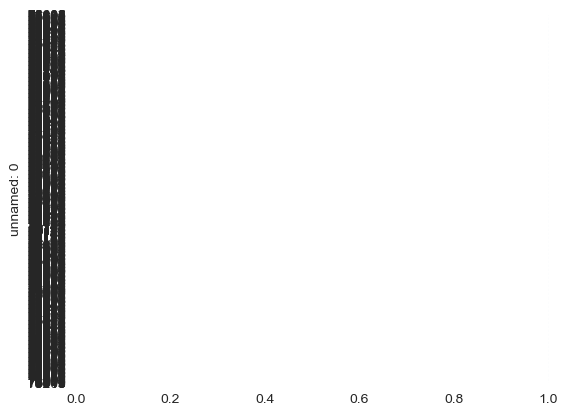

version


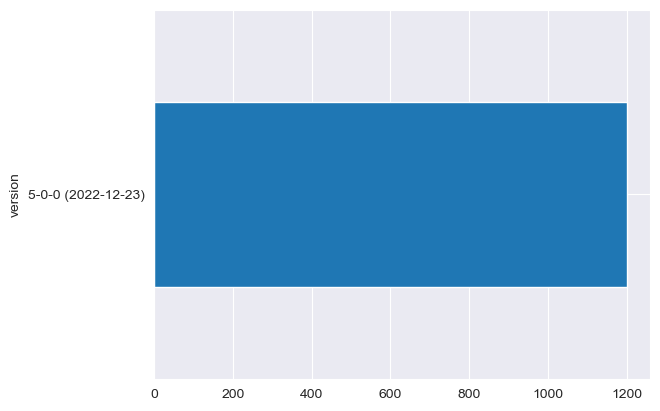

doi


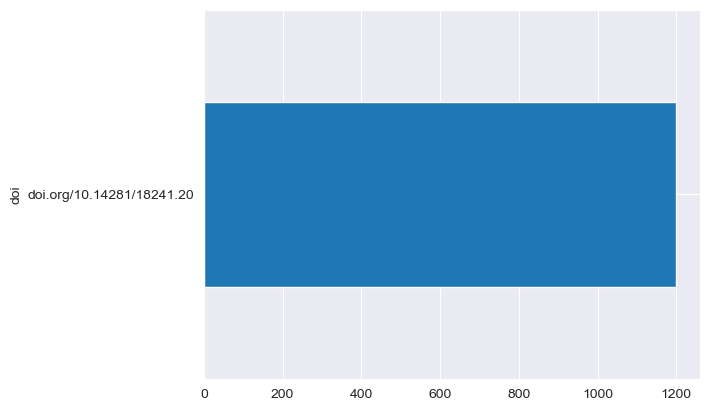

a_wave


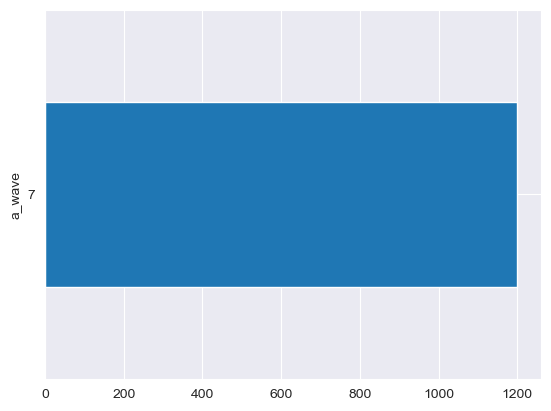

a_year


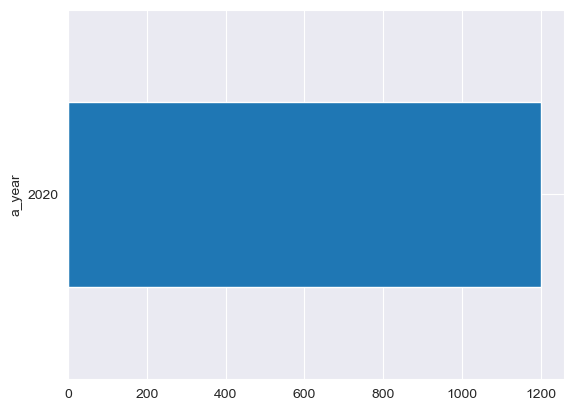

a_study


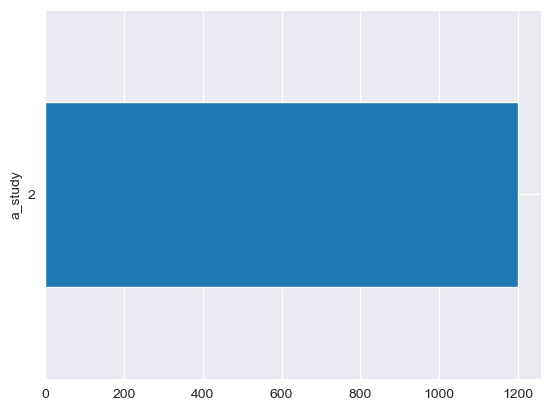

b_country


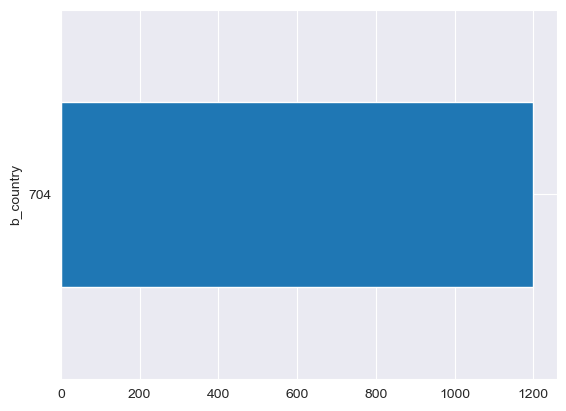

b_country_alpha


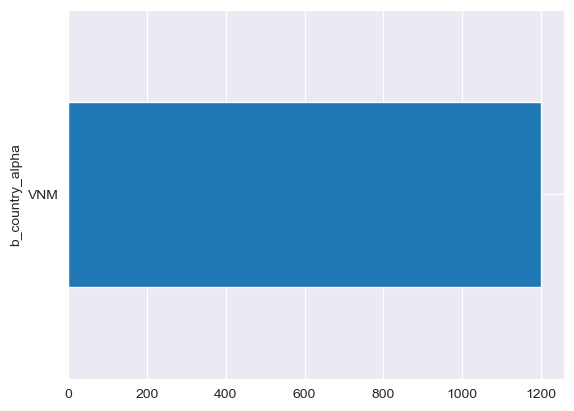

c_cow_num


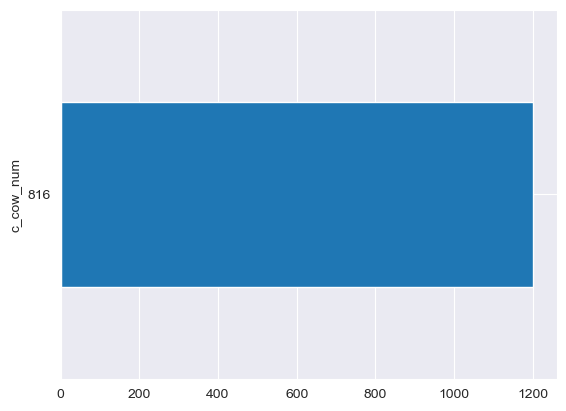

c_cow_alpha


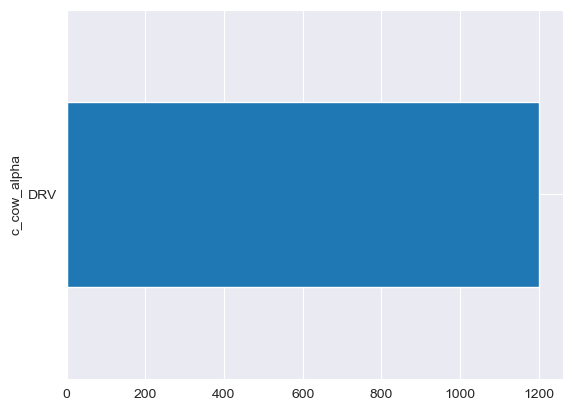

d_interview


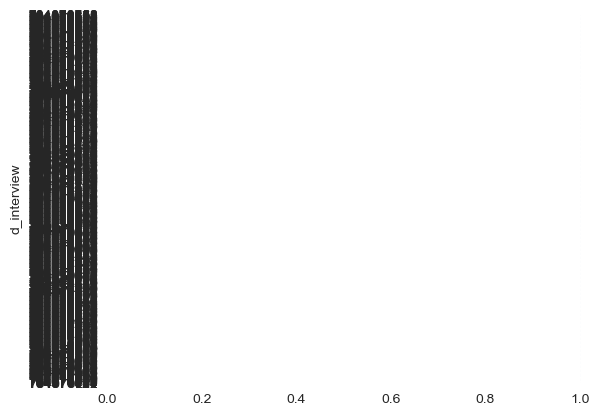

s007


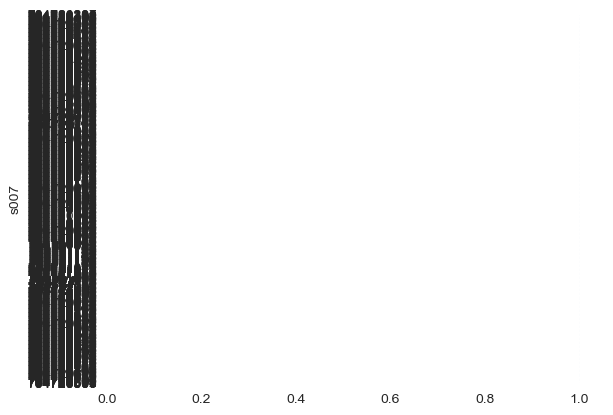

j_intdate


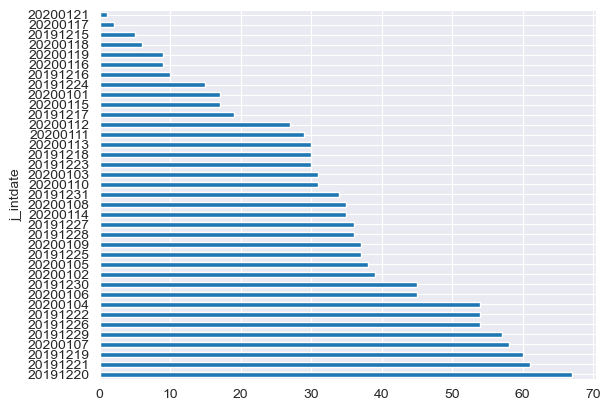

fw_end


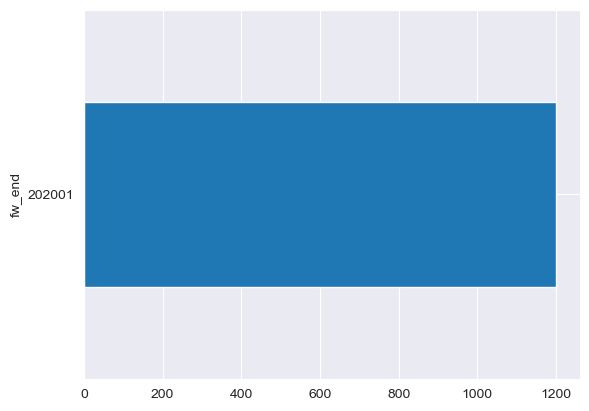

fw_start


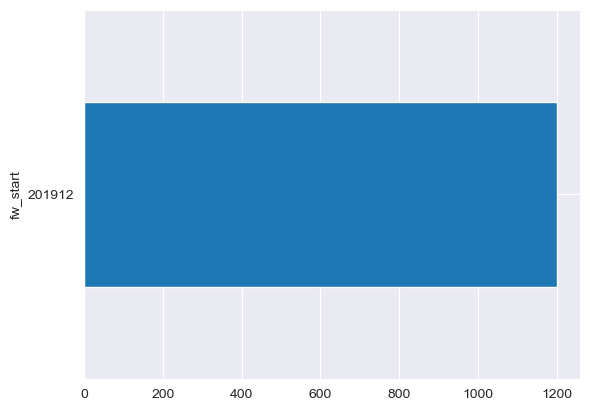

k_time_start


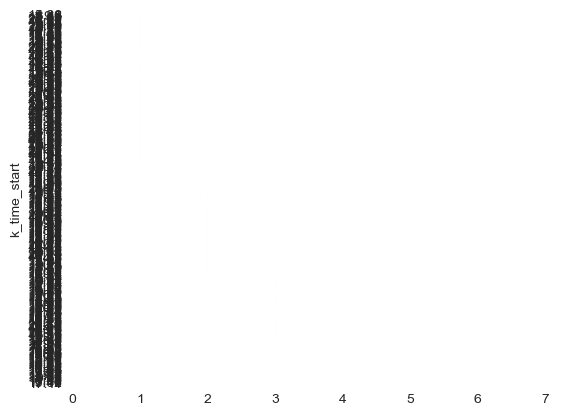

k_time_end


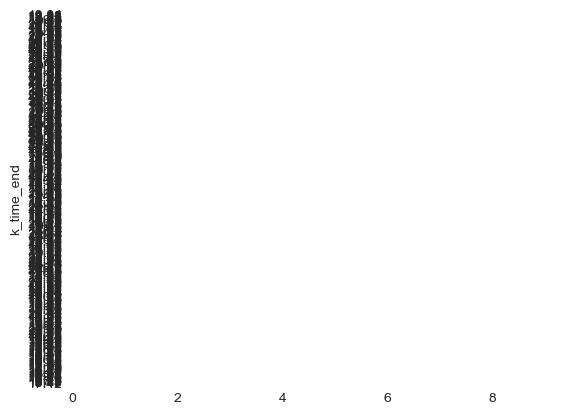

k_duration


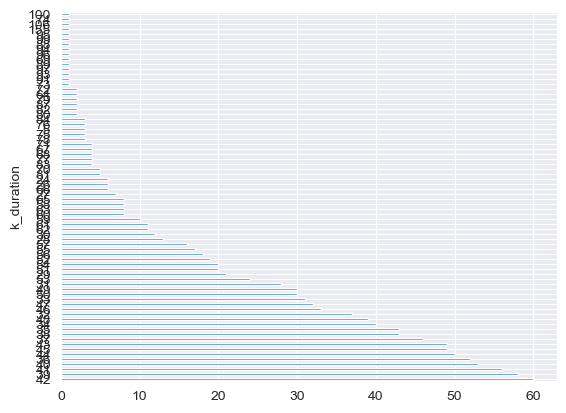

q_mode


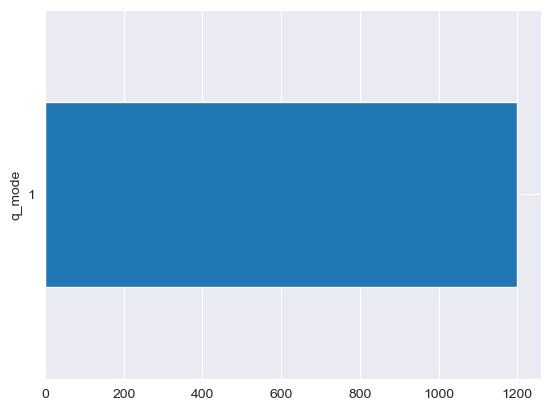

n_region_iso


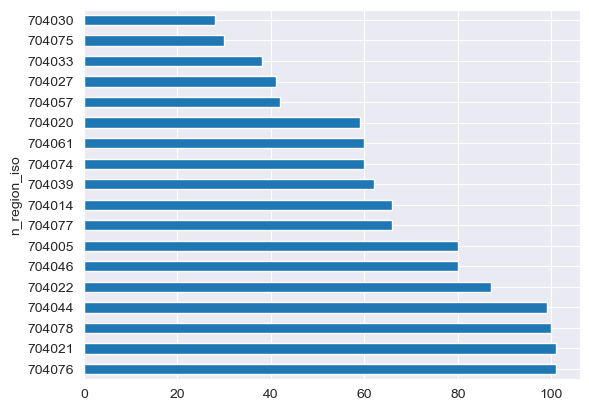

n_region_wvs


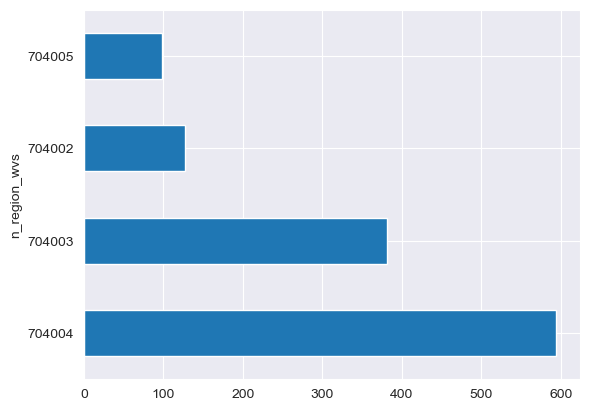

n_region_nuts2


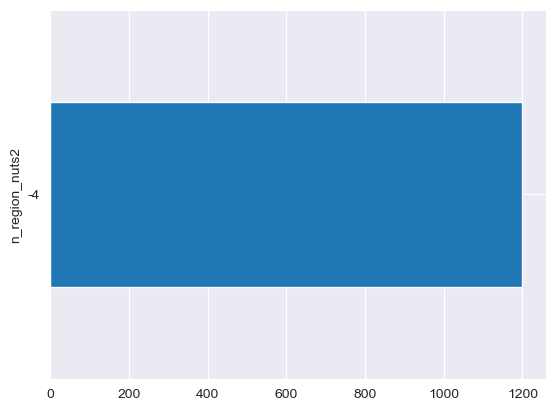

reg_nuts1


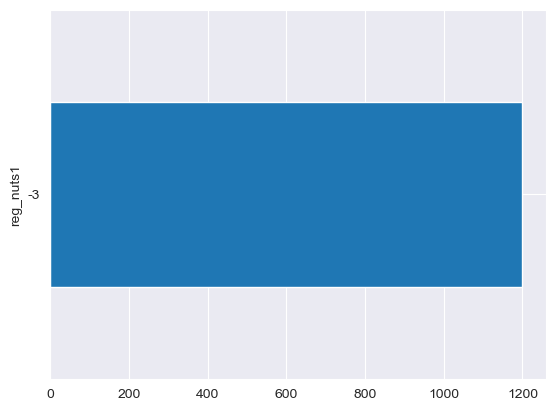

n_town


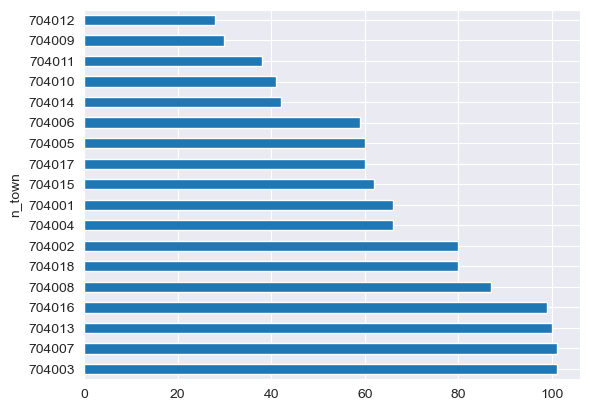

g_townsize


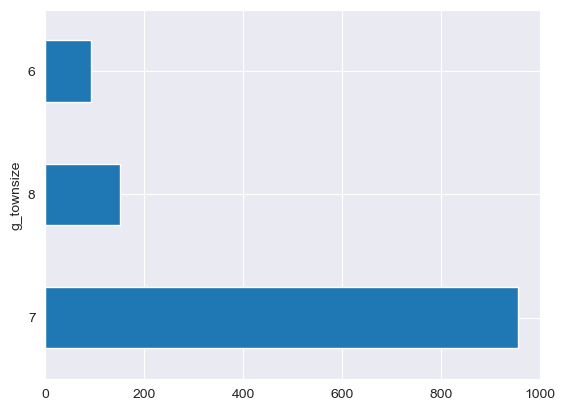

g_townsize2


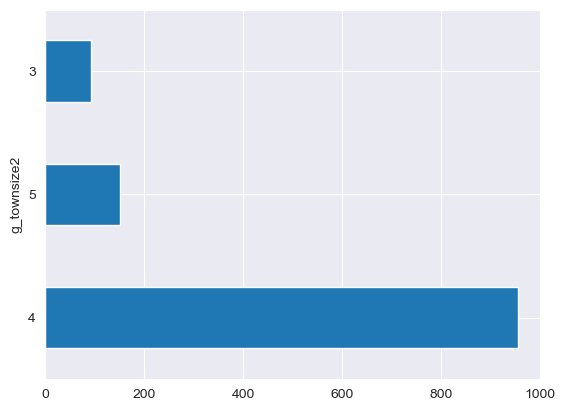

h_settlement


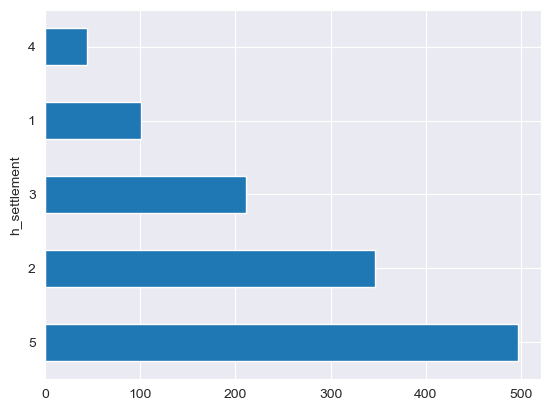

h_urbrural


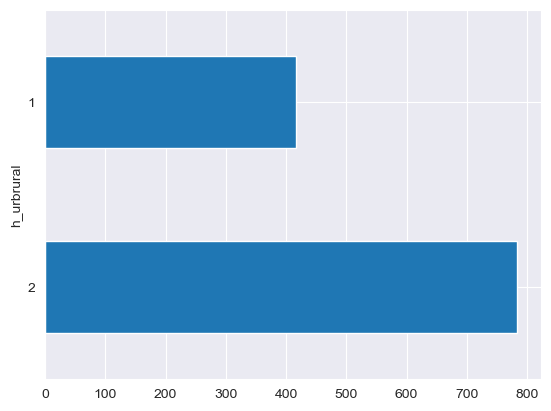

l_interviewer_number


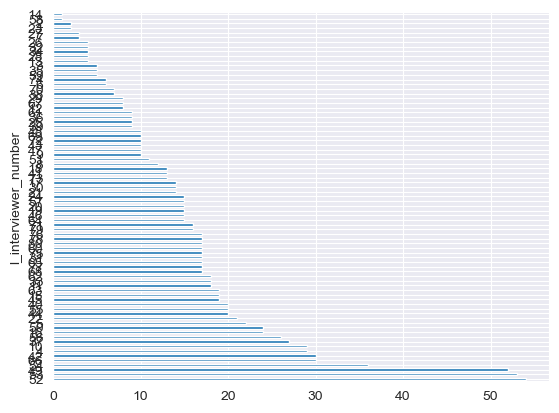

i_psu


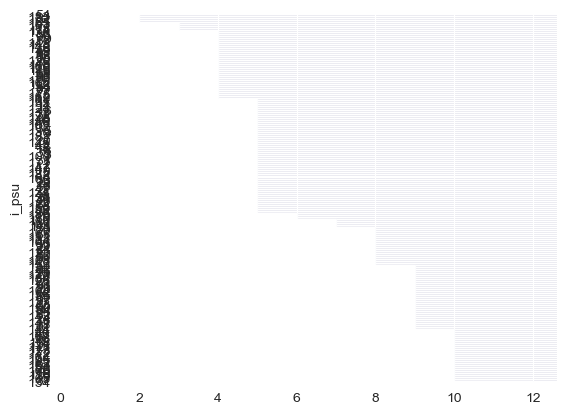

o1_longitude


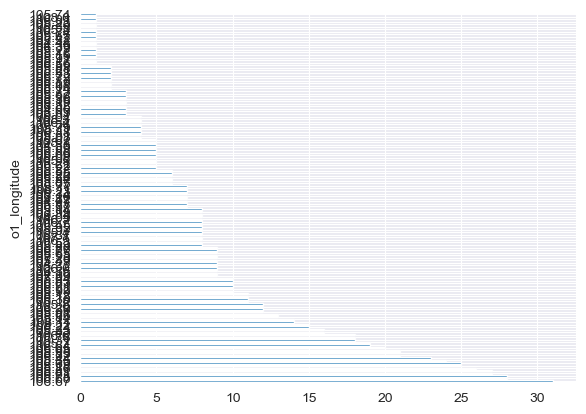

o2_latitude


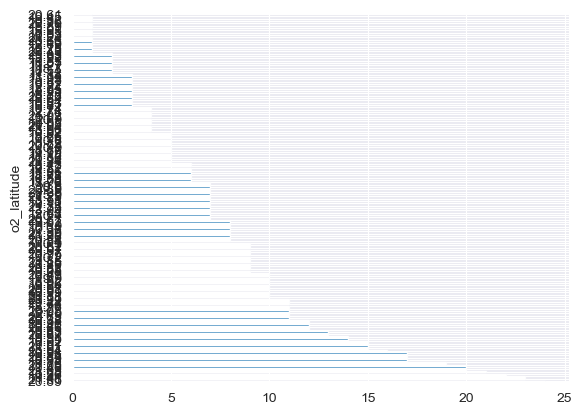

s_intlanguage


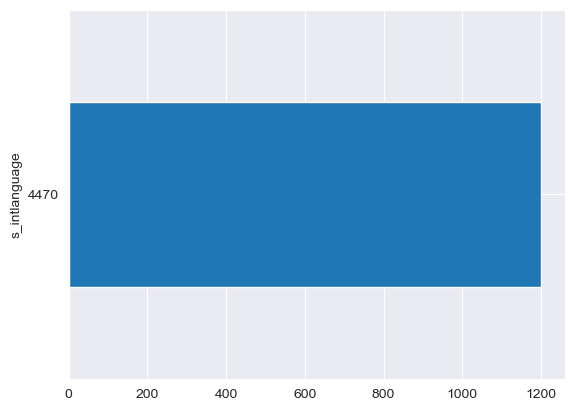

lnge_iso


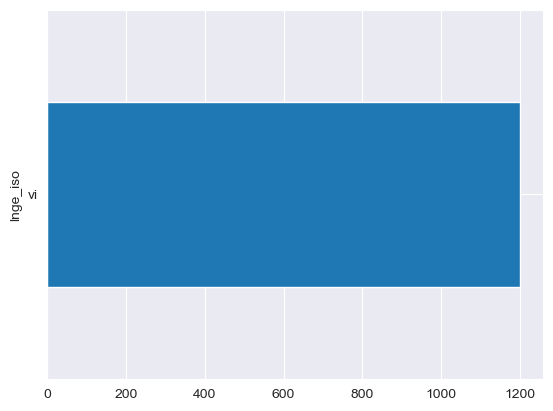

e_respint


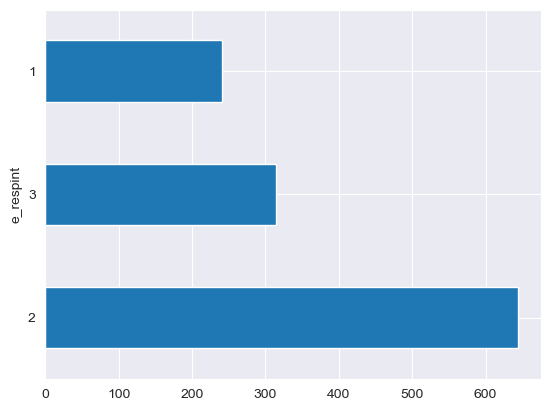

f_intprivacy


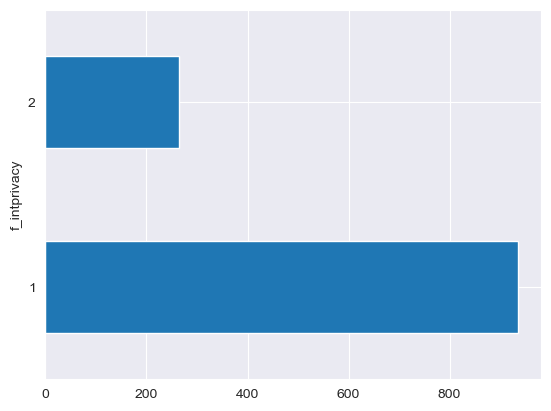

e1_literacy


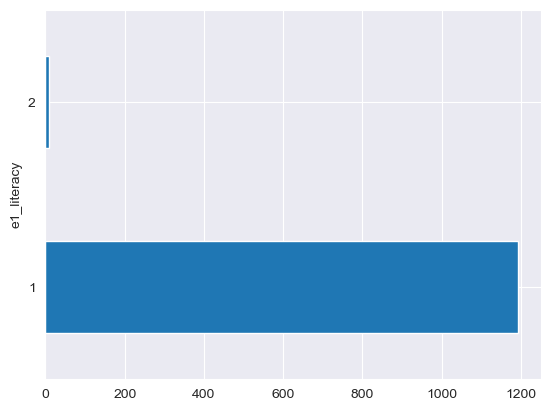

w_weight


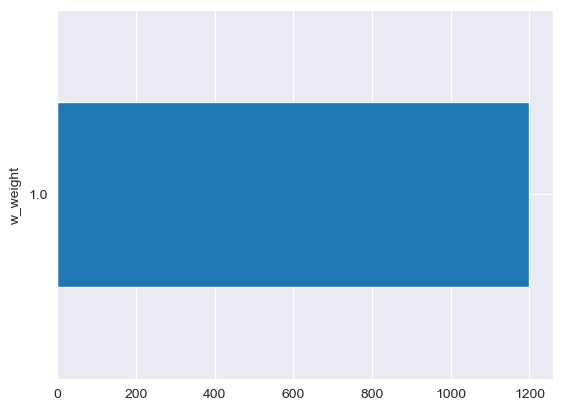

s018


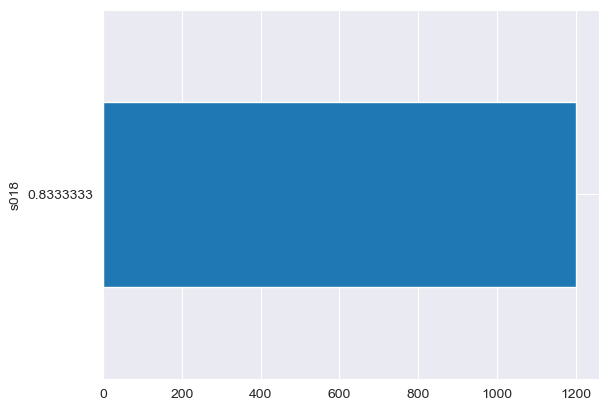

s025


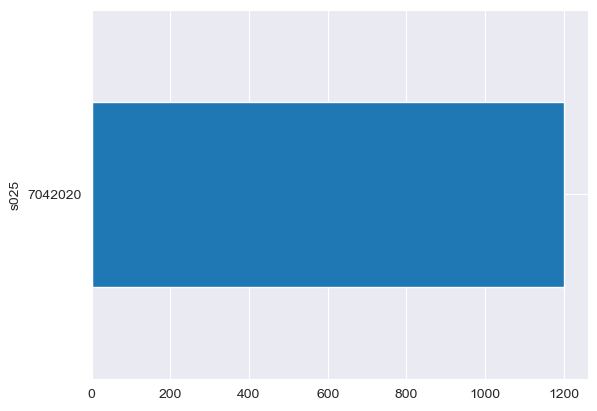

q1


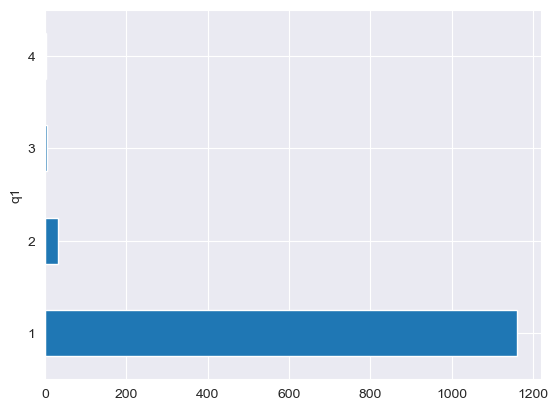

In [14]:
lkp_cols=vi.loc[:, :'q1'].columns.to_list()
for col in lkp_cols:
    print(col)
    vi[col].value_counts().plot(kind='barh')
    plt.show()

<Axes: title={'center': 'distribution of time for completing survey'}, ylabel='categ_k_duration'>

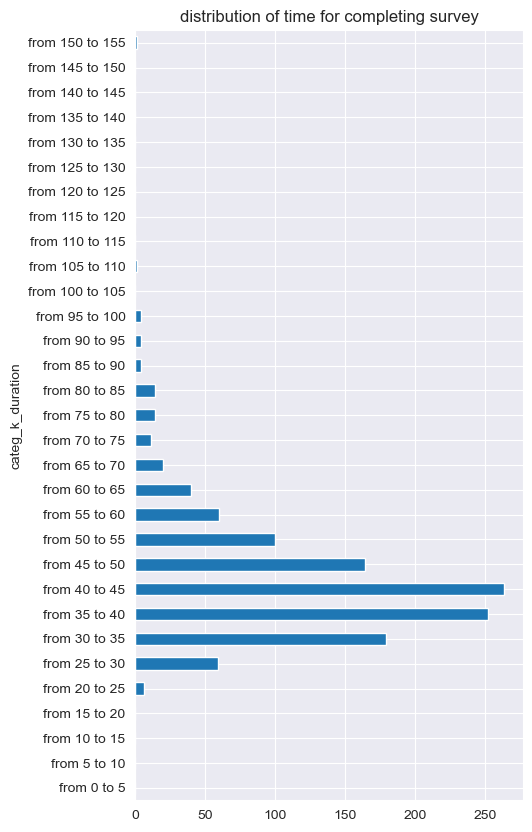

In [15]:
max_range=vi.k_duration.max() // 5
vi['categ_k_duration'] = pd.cut(vi.k_duration,
                              bins=[x*5 for x in range(max_range+1)],
                              labels=[f"from {x*5} to {(x+1)*5}" for x in range(max_range)]
                            )
vi['categ_k_duration'].value_counts().sort_index().plot(kind='barh', figsize=(5, 10), 
                                                        title="distribution of time for completing survey")

<Axes: title={'center': 'time in day for starting survey'}, ylabel='k_time_start'>

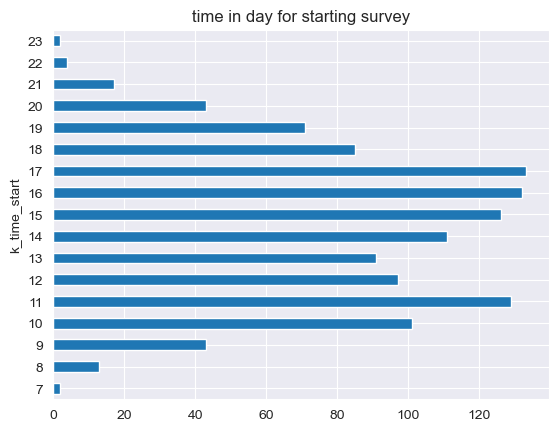

In [16]:
vi.k_time_start.astype(str).str.split(".").str[0].astype(int)\
    .value_counts().sort_index().plot(kind='barh',
                                      title='time in day for starting survey')
# what is the -5 values??? why there are so many of them? 

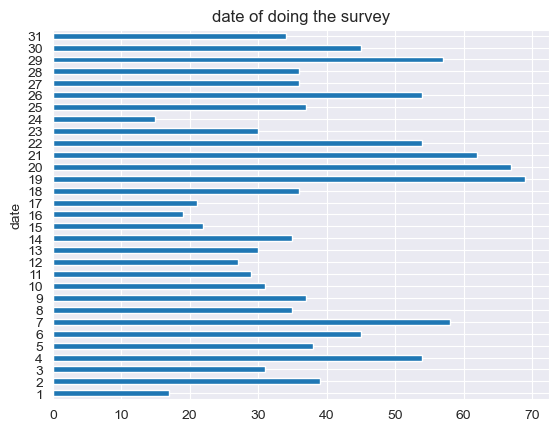

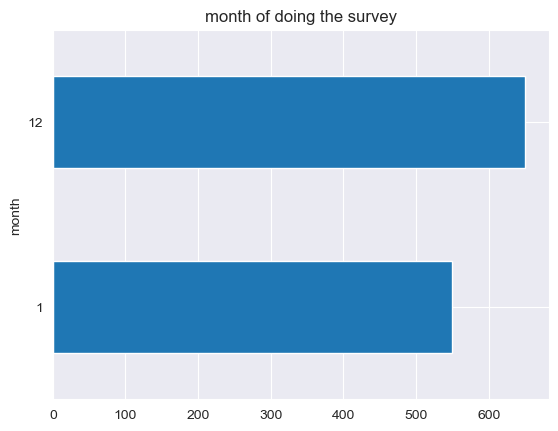

In [17]:
vi['date']=vi.j_intdate.astype(str).str[-2:].astype(int)
vi['month']=vi.j_intdate.astype(str).str[-4:-2].astype(int)
for i in ['date', 'month']:
    vi[i].value_counts().sort_index().plot(kind='barh', title=f"{i} of doing the survey")
    plt.show()

# Social Values Variables

q1 : Important in life: Family - Vietnam


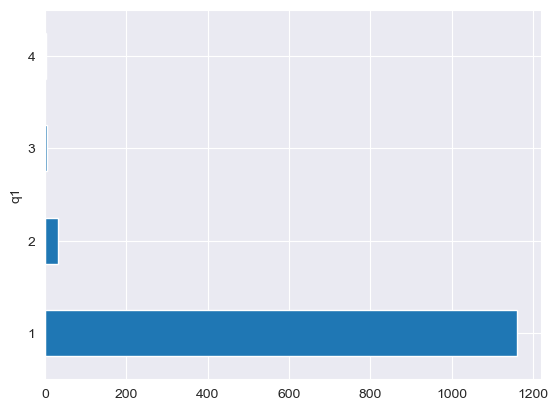

q2 : Important in life: Friends - Vietnam


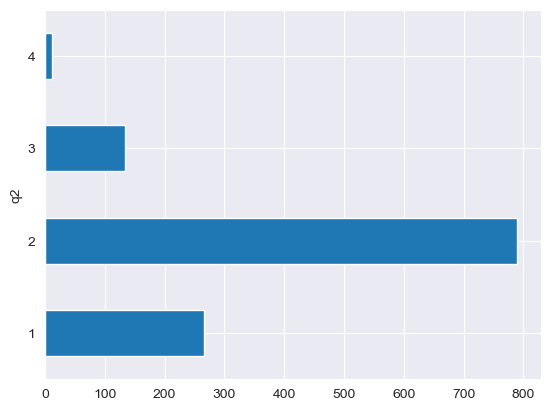

q3 : Important in life: Leisure time - Vietnam


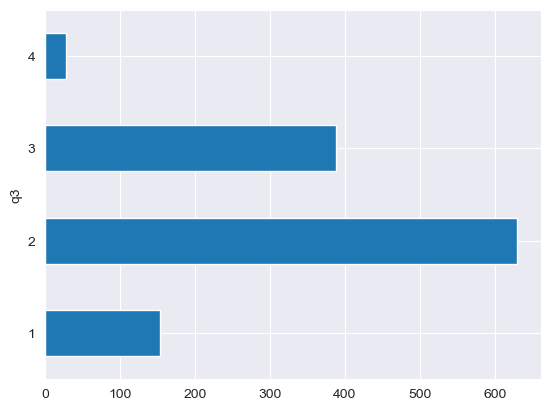

q4 : Important in life: Politics - Vietnam


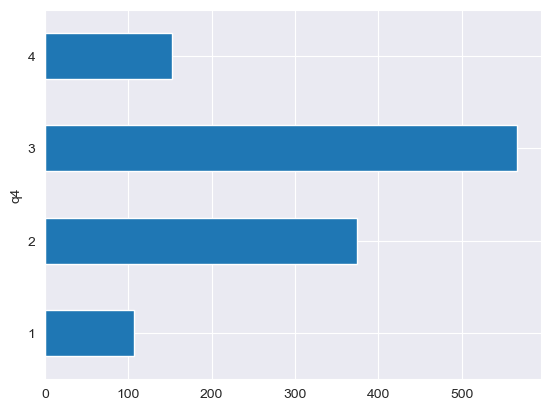

q5 : Important in life: Work - Vietnam


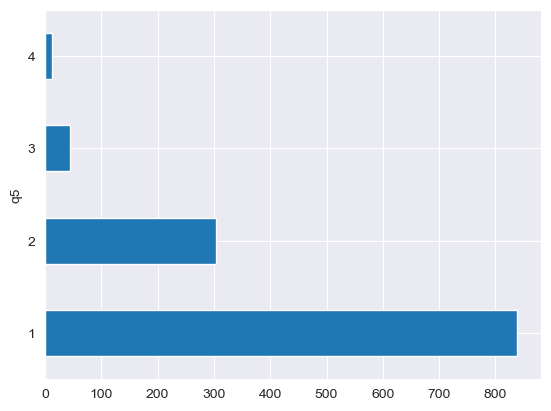

q6 : Important in life: Religion - Vietnam


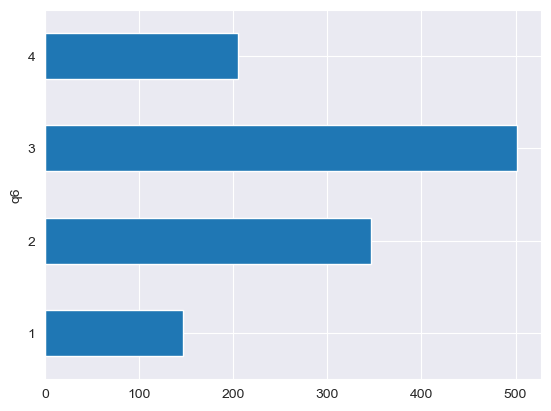

q7 : Important child qualities: good manners - Vietnam


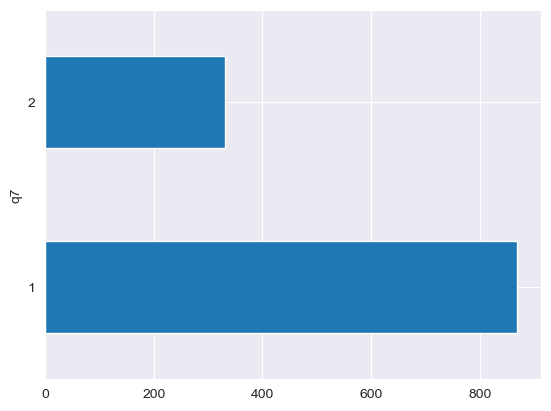

q8 : Important child qualities: independence - Vietnam


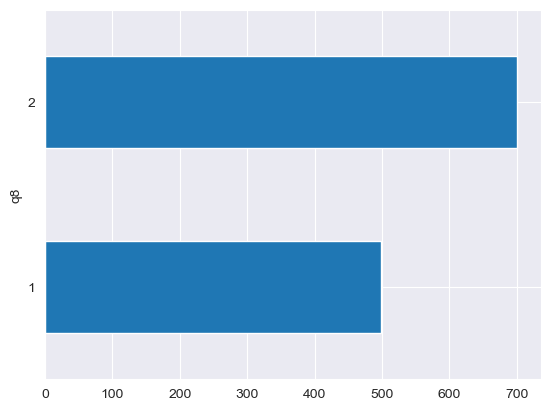

q9 : Important child qualities: hard work - Vietnam


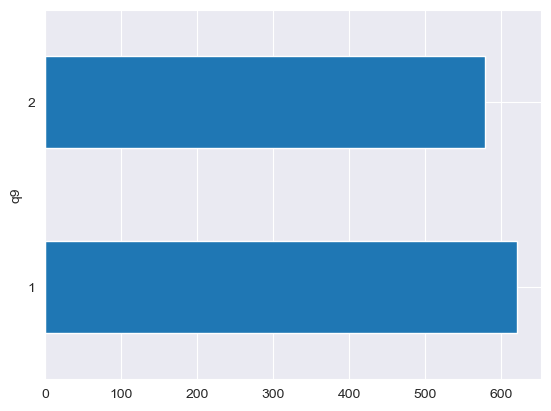

q10 : Important child qualities: feeling of responsibility - Vietnam


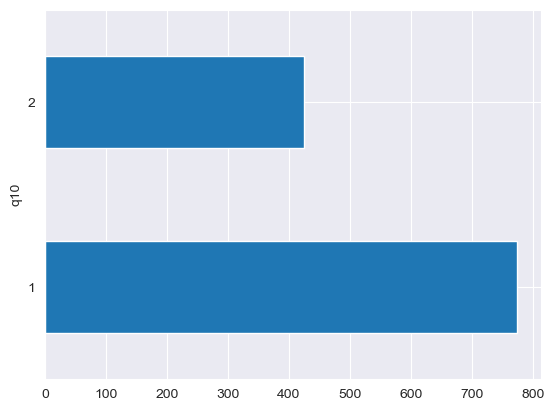

q11 : Important child qualities: imagination - Vietnam


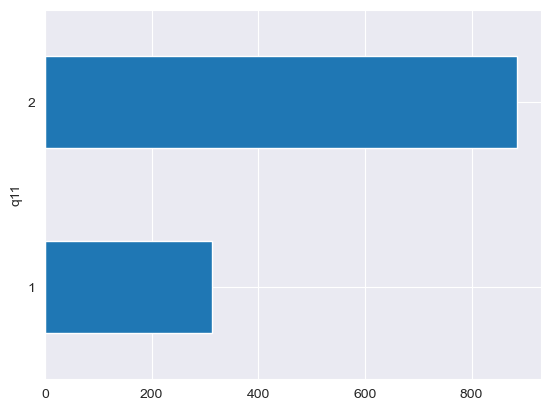

q12 : Important child qualities: tolerance and respect for other people - Vietnam


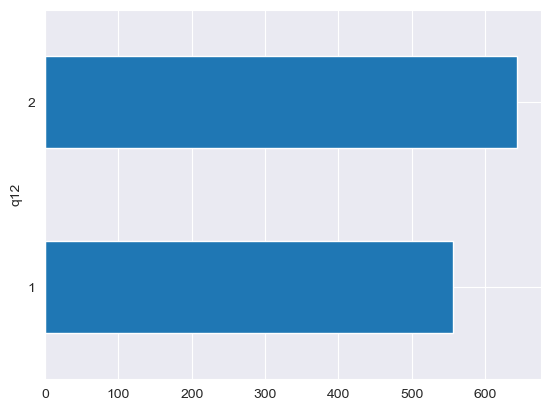

q13 : Important child qualities: thrift saving money and things - Vietnam


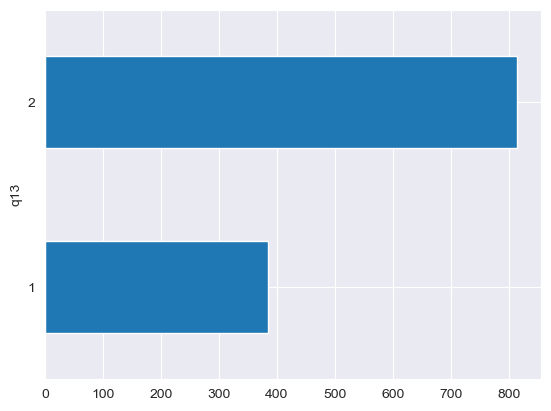

q14 : Important child qualities: determination perseverance - Vietnam


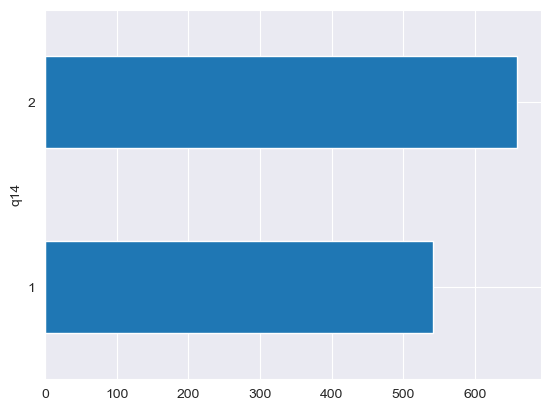

q15 : Important child qualities: religious faith - Vietnam


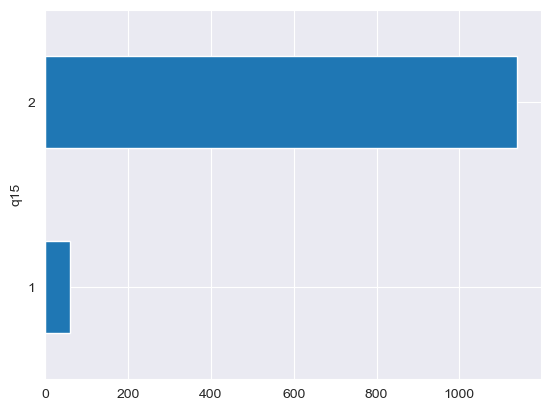

q16 : Important child qualities: unselfishness - Vietnam


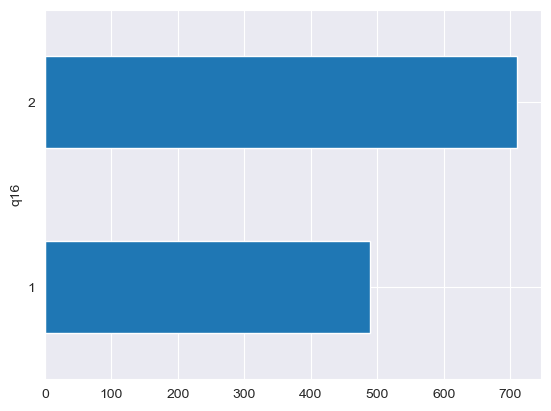

q17 : Important child qualities: obedience - Vietnam


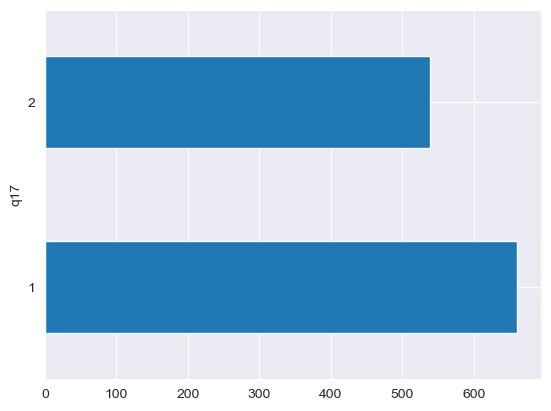

q18 : Neighbors: Drug addicts - Vietnam


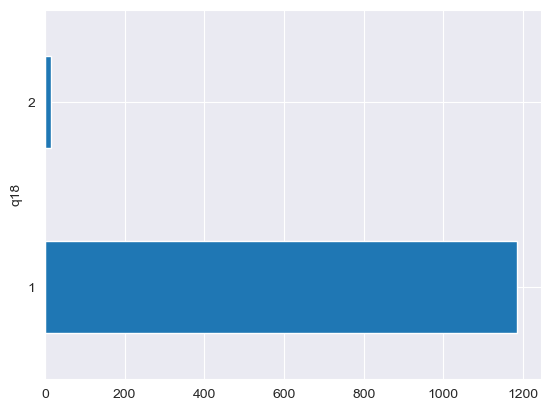

q19 : Neighbors: People of a different race - Vietnam


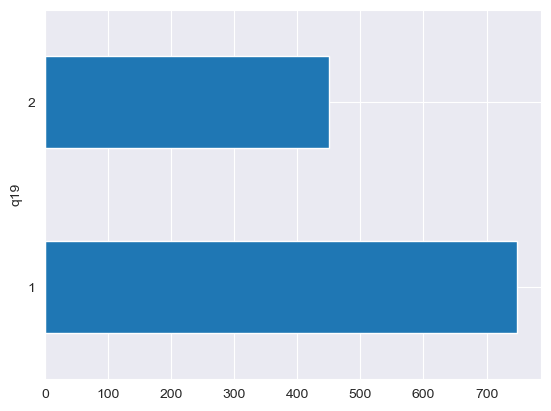

q20 : Neighbors: People who have AIDS - Vietnam


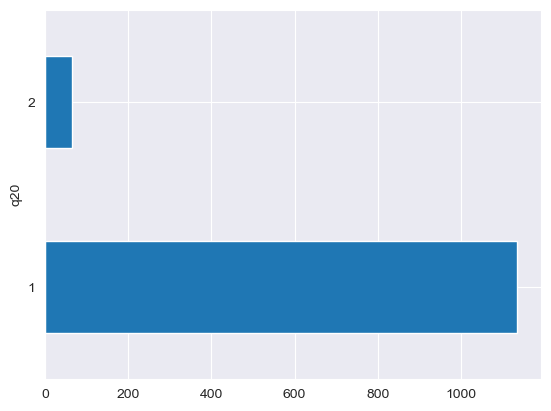

q21 : Neighbors: Immigrants/foreign workers - Vietnam


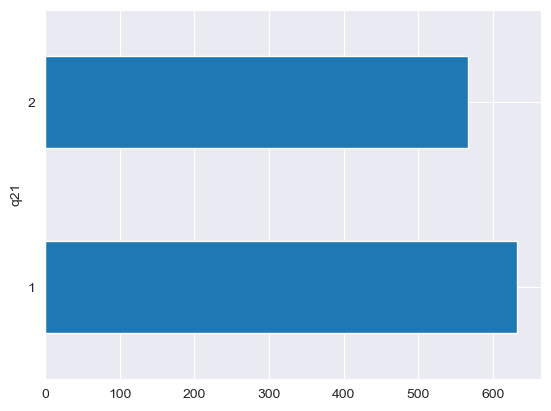

q22 : Neighbors: Homosexuals - Vietnam


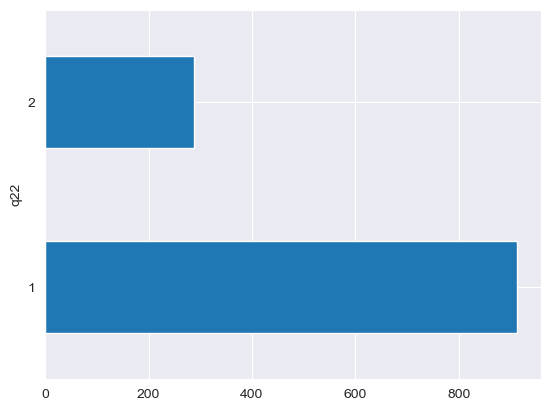

q23 : Neighbors: People of a different religion - Vietnam


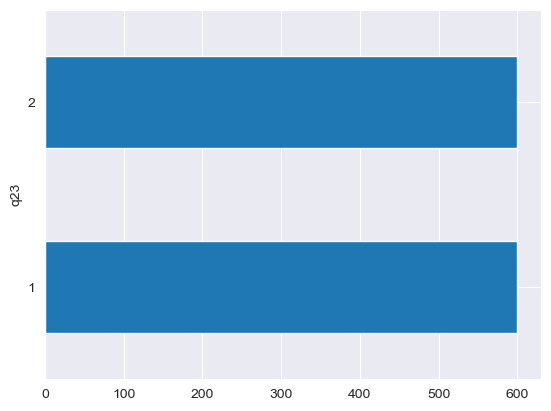

q24 : Neighbors: Heavy drinkers - Vietnam


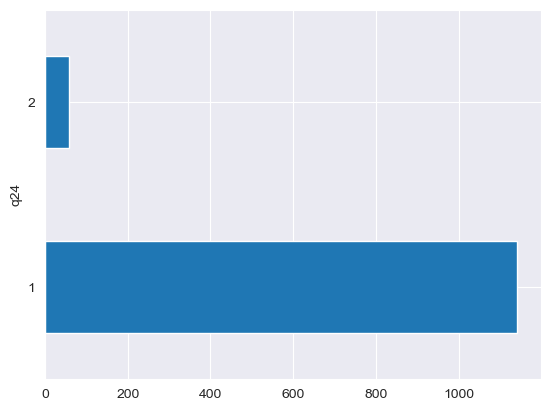

q25 : Neighbors: Unmarried couples living together - Vietnam


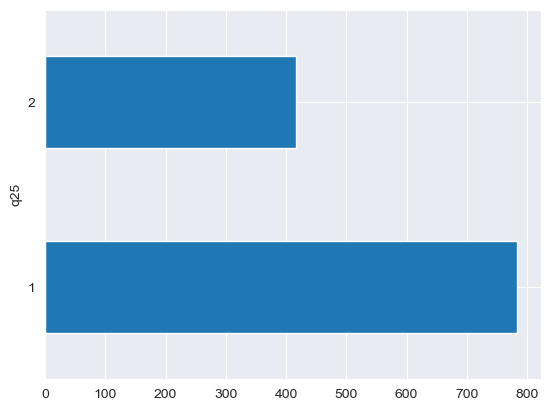

q26 : Neighbors: People who speak a different language - Vietnam


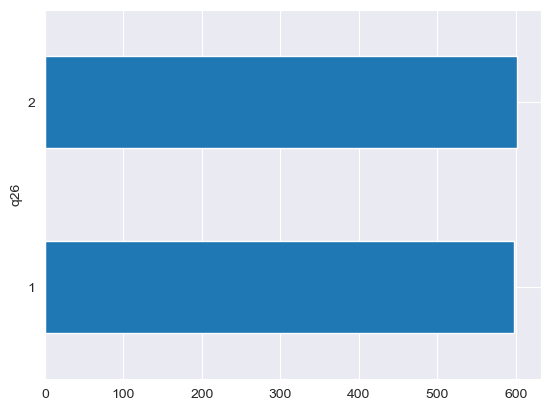

q27 : One of main goals in life has been to make my parents proud - Vietnam


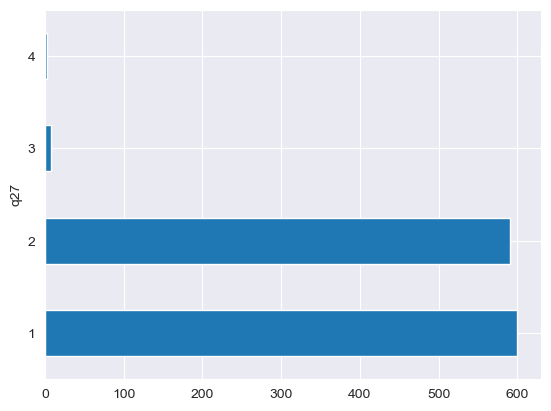

q28 : Pre-school child suffers with working mother - Vietnam


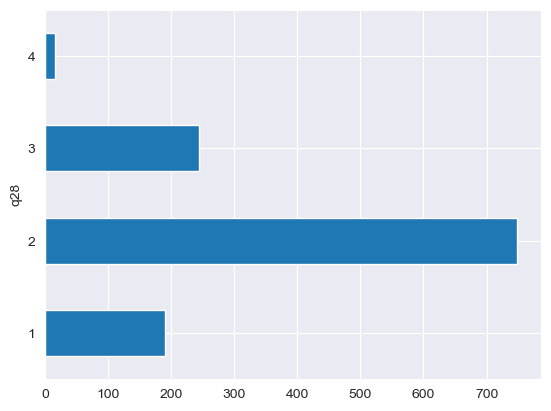

q29 : Men make better political leaders than women do - Vietnam


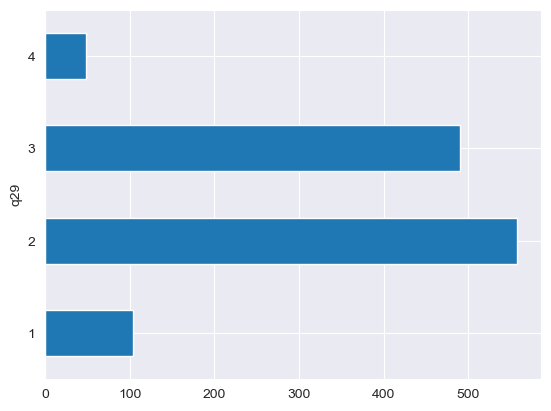

q30 : University is more important for a boy than for a girl - Vietnam


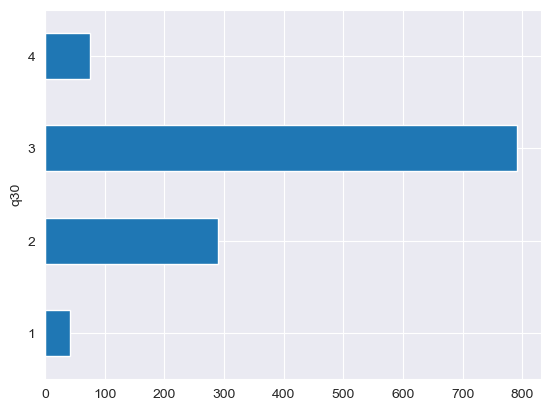

q31 : Men make better business executives than women do - Vietnam


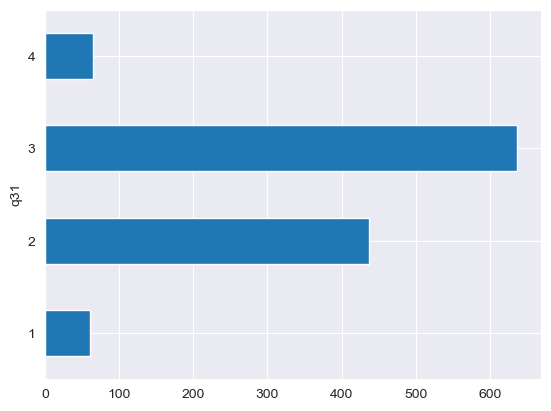

q32 : Being a housewife just as fulfilling - Vietnam


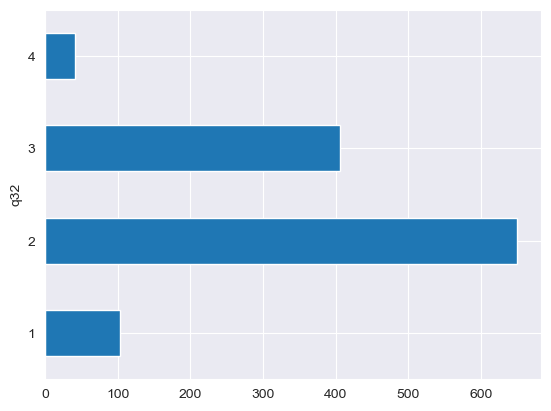

q33 : Jobs scarce: Men should have more right to a job than women - Vietnam


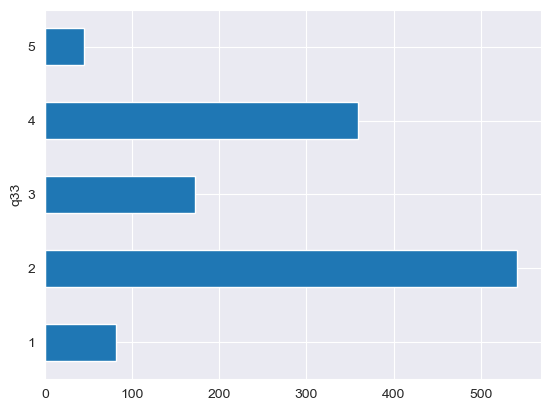

q33_3 : Jobs scarce: Men should have more right to a job than women (3-point scale) - Vietnam


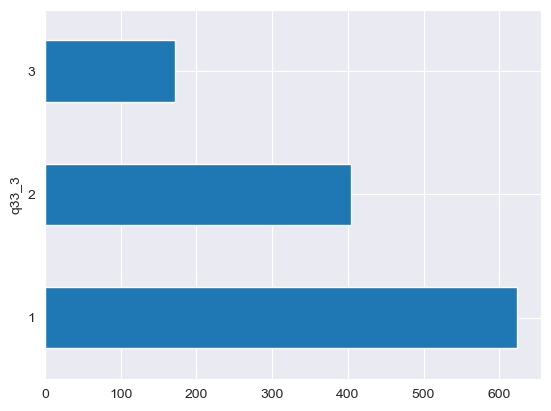

q34 : Jobs scarce: Employers should give priority to (nation) people than immigrants - Vietnam


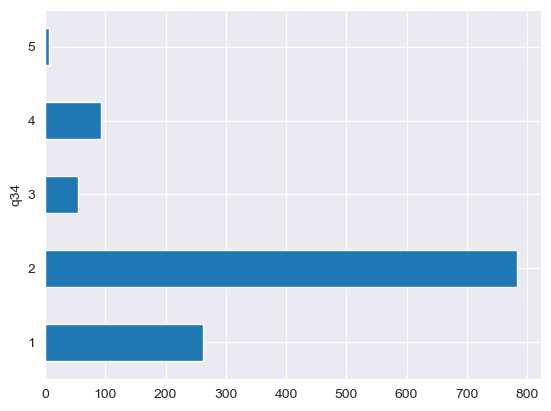

q34_3 : Jobs scarce: Employers should give priority to (nation) people than immigrants ( - Vietnam


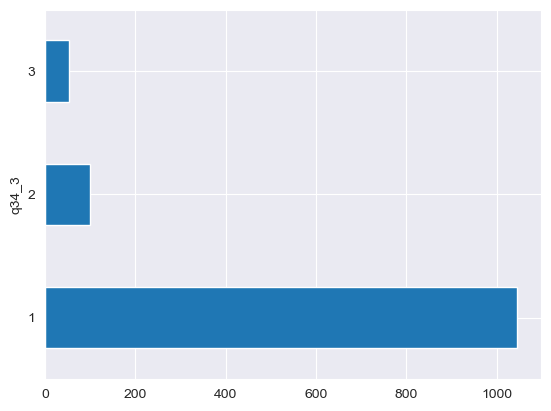

q35 : Problem if women have more income than husband - Vietnam


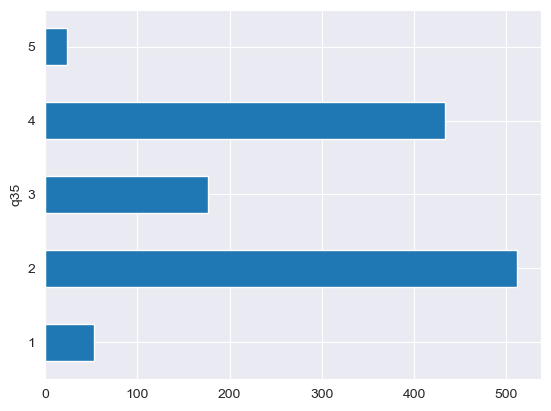

q35_3 : Problem if women have more income than husband (3-point scale) - Vietnam


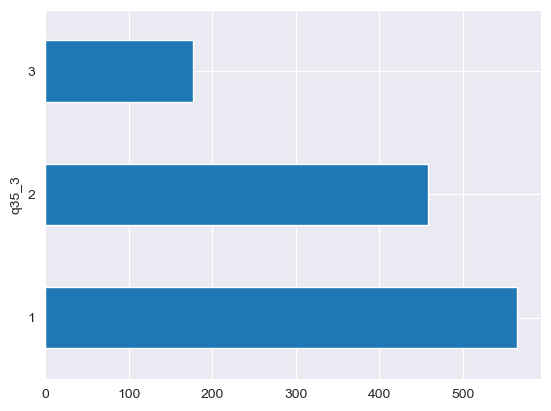

q36 : Homosexual couples are as good parents as other couples - Vietnam


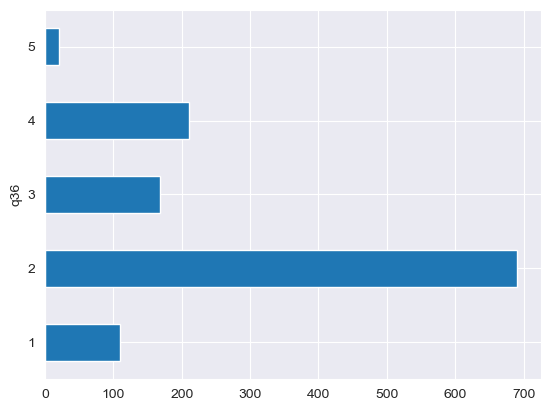

q37 : Duty towards society to have children - Vietnam


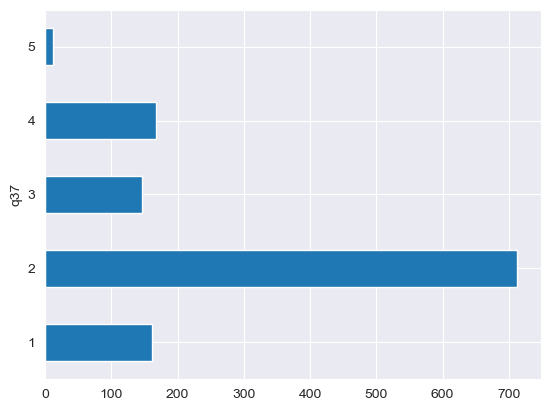

q38 : It is children duty to take care of ill parent - Vietnam


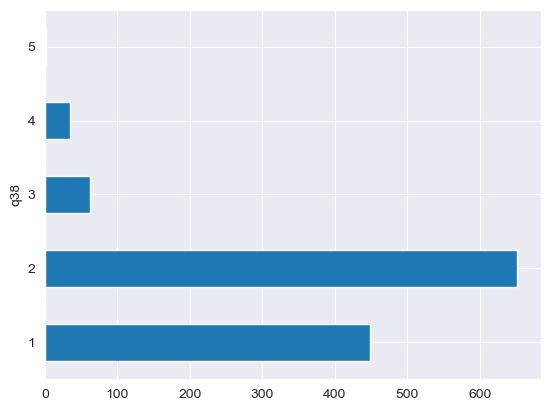

q39 : People who don't work turn lazy - Vietnam


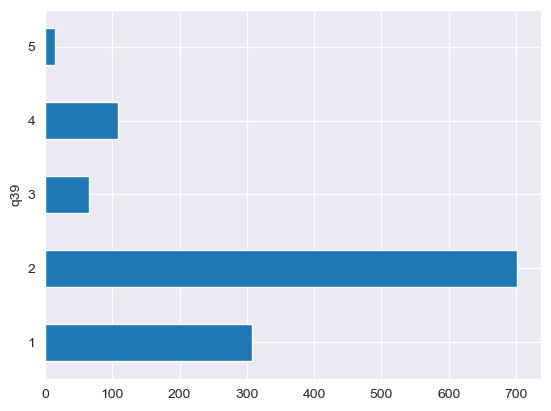

q40 : Work is a duty towards society - Vietnam


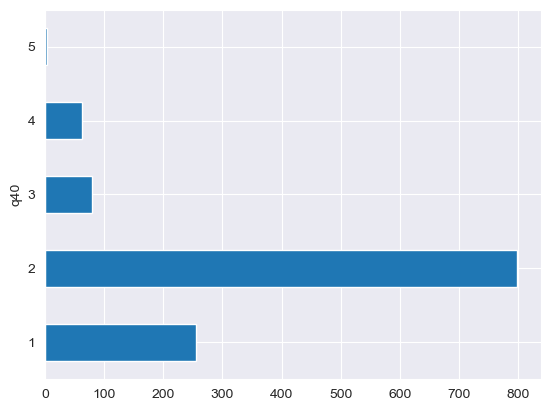

q41 : Work should  always come first even if it means less spare time - Vietnam


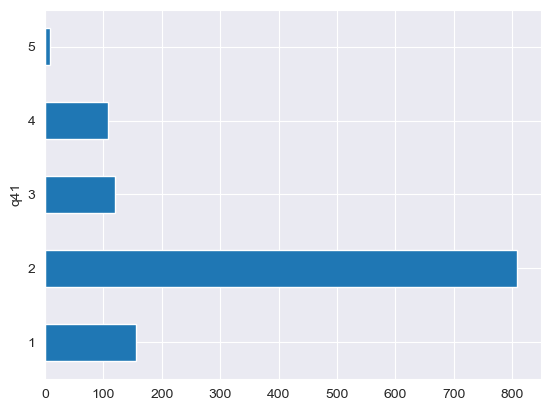

q42 : Basic kinds of attitudes concerning society - Vietnam


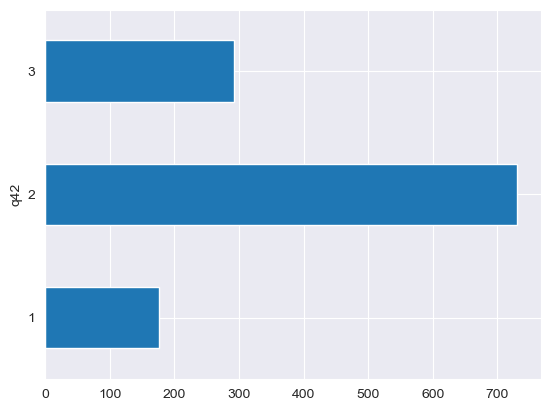

q43 : Future changes: Less importance placed on work - Vietnam


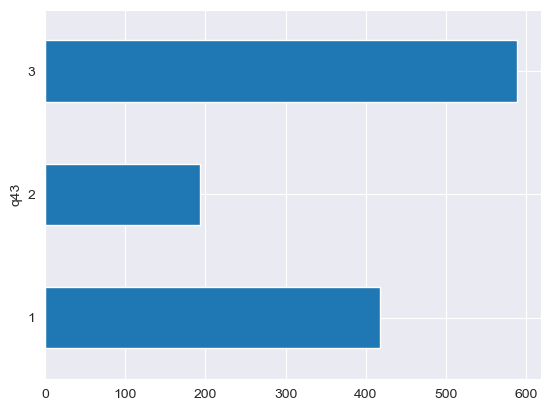

q44 : Future changes: More emphasis on technology - Vietnam


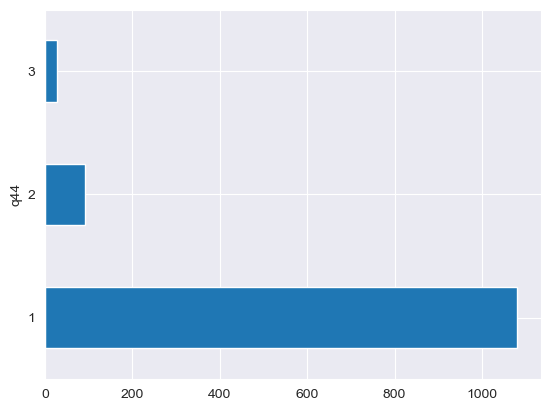

q45 : Future changes: Greater respect for authority - Vietnam


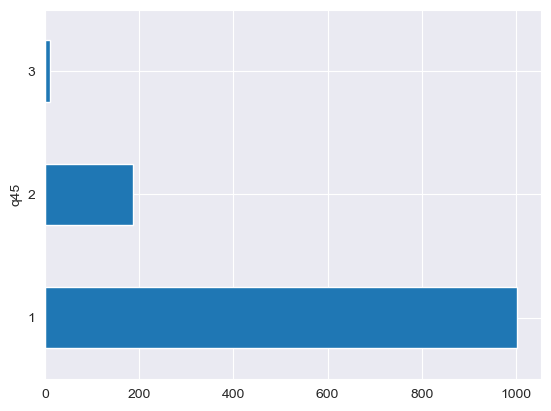

In [18]:
for col in vi[social_values].columns:
    print(col, ":", ques_dict[col], "- Vietnam")
    vi[col].value_counts().sort_index().plot(kind='barh')
    plt.show()
# df[social_values].describe()


In [19]:
def qcode_to_full_question(columns):
    for col in columns:
        print(col, ":", ques_dict[col])

---Important qualities children should learn
q7 : Important child qualities: good manners
q8 : Important child qualities: independence
q9 : Important child qualities: hard work
q10 : Important child qualities: feeling of responsibility
q11 : Important child qualities: imagination
q12 : Important child qualities: tolerance and respect for other people
q13 : Important child qualities: thrift saving money and things
q14 : Important child qualities: determination perseverance
q15 : Important child qualities: religious faith
q16 : Important child qualities: unselfishness
q17 : Important child qualities: obedience


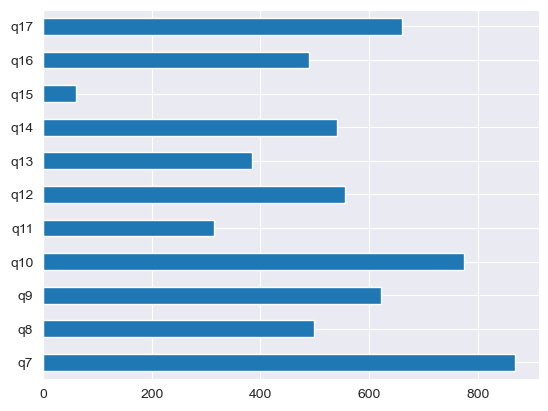

In [20]:
# q7 to q26 must be handled differently
lkp_cols = ['q7',
            'q8',
            'q9',
            'q10',
            'q11',
            'q12',
            'q13',
            'q14',
            'q15',
            'q16',
            'q17',]
print("---Important qualities children should learn")
qcode_to_full_question(lkp_cols)
vi[lkp_cols].replace(2, 0).sum().plot(kind='barh')
plt.show()


## People you don't want to be neighbors

In [22]:
thai=pd.read_csv('../data/processed/THA.csv')
thai.columns=thai.columns.str.lower()
usa=pd.read_csv('../data/processed/USA.csv')
usa.columns=usa.columns.str.lower()

In [23]:
# seeing percentage of missing values
lkp_cols = ['q18',
            'q19',
            'q20',
            'q21',
            'q22',
            'q23',
            'q24',
            'q25',
            'q26',]
for col in lkp_cols:
    print("---")
    print(ques_dict[col])
    for country, label in zip([vi, thai, usa], ['vietnam', 'thailand', 'usa']):
        print(f"{label.upper()}")
        df=country[lkp_cols+['q1']].query(f"{col}>0") # I add q1 here just for counting
        print(f"Missing values of {col}", ":", 100-df.shape[0]*100/len(country), "%")
        pivot=pd.pivot_table(data=df, index=col, values="q1", aggfunc='count').rename(columns={"q1":"count"})
        pivot['percent']=pivot['count']/pivot['count'].sum()
        display(pivot.style.bar(subset='percent'))
    


---
Neighbors: Drug addicts
VIETNAM
Missing values of q18 : 0.0 %


,count,percent
q18,,
1,1186,0.988333
2,14,0.011667


THAILAND
Missing values of q18 : 0.0 %


,count,percent
q18,,
1,1333,0.888667
2,167,0.111333


USA
Missing values of q18 : 6.20184899845917 %


,count,percent
q18,,
1,2318,0.951951
2,117,0.048049


---
Neighbors: People of a different race
VIETNAM
Missing values of q19 : 0.0 %


,count,percent
q19,,
1,749,0.624167
2,451,0.375833


THAILAND
Missing values of q19 : 0.0 %


,count,percent
q19,,
1,487,0.324667
2,1013,0.675333


USA
Missing values of q19 : 6.20184899845917 %


,count,percent
q19,,
1,78,0.032033
2,2357,0.967967


---
Neighbors: People who have AIDS
VIETNAM
Missing values of q20 : 0.0 %


,count,percent
q20,,
1,1136,0.946667
2,64,0.053333


THAILAND
Missing values of q20 : 0.0 %


,count,percent
q20,,
1,729,0.486000
2,771,0.514000


USA
Missing values of q20 : 6.20184899845917 %


,count,percent
q20,,
1,306,0.125667
2,2129,0.874333


---
Neighbors: Immigrants/foreign workers
VIETNAM
Missing values of q21 : 0.0 %


,count,percent
q21,,
1,633,0.527500
2,567,0.472500


THAILAND
Missing values of q21 : 0.0 %


,count,percent
q21,,
1,581,0.387333
2,919,0.612667


USA
Missing values of q21 : 6.20184899845917 %


,count,percent
q21,,
1,214,0.087885
2,2221,0.912115


---
Neighbors: Homosexuals
VIETNAM
Missing values of q22 : 0.0 %


,count,percent
q22,,
1,913,0.760833
2,287,0.239167


THAILAND
Missing values of q22 : 0.0 %


,count,percent
q22,,
1,527,0.351333
2,973,0.648667


USA
Missing values of q22 : 6.20184899845917 %


,count,percent
q22,,
1,313,0.128542
2,2122,0.871458


---
Neighbors: People of a different religion
VIETNAM
Missing values of q23 : 0.0 %


,count,percent
q23,,
1,600,0.500000
2,600,0.500000


THAILAND
Missing values of q23 : 0.0 %


,count,percent
q23,,
1,383,0.255333
2,1117,0.744667


USA
Missing values of q23 : 6.20184899845917 %


,count,percent
q23,,
1,67,0.027515
2,2368,0.972485


---
Neighbors: Heavy drinkers
VIETNAM
Missing values of q24 : 0.0 %


,count,percent
q24,,
1,1142,0.951667
2,58,0.048333


THAILAND
Missing values of q24 : 0.0 %


,count,percent
q24,,
1,964,0.642667
2,536,0.357333


USA
Missing values of q24 : 6.20184899845917 %


,count,percent
q24,,
1,1808,0.742505
2,627,0.257495


---
Neighbors: Unmarried couples living together
VIETNAM
Missing values of q25 : 0.0 %


,count,percent
q25,,
1,784,0.653333
2,416,0.346667


THAILAND
Missing values of q25 : 0.0 %


,count,percent
q25,,
1,404,0.269333
2,1096,0.730667


USA
Missing values of q25 : 6.20184899845917 %


,count,percent
q25,,
1,114,0.046817
2,2321,0.953183


---
Neighbors: People who speak a different language
VIETNAM
Missing values of q26 : 0.0 %


,count,percent
q26,,
1,598,0.498333
2,602,0.501667


THAILAND
Missing values of q26 : 0.0 %


,count,percent
q26,,
1,384,0.256000
2,1116,0.744000


USA
Missing values of q26 : 6.20184899845917 %


,count,percent
q26,,
1,228,0.093634
2,2207,0.906366


## Qualities that children should have 

In [24]:
lkp_cols = ['q7',
            'q8',
            'q9',
            'q10',
            'q11',
            'q12',
            'q13',
            'q14',
            'q15',
            'q16',
            'q17',]
for col in lkp_cols:
    print("---")
    print(ques_dict[col])
    for country, label in zip([vi, thai, usa], ['vietnam', 'thailand', 'usa']):
        print(f"{label.upper()}")
        df=country[lkp_cols+['q1']].query(f"{col}>0") # I add q1 here just for counting
        print(f"Missing values of {col}", ":", 100-df.shape[0]*100/len(country), "%")
        pivot=pd.pivot_table(data=df, index=col, values="q1", aggfunc='count').rename(columns={"q1":"count"})
        pivot['percent']=pivot['count']/pivot['count'].sum()
        display(pivot.style.bar(subset='percent'))

---
Important child qualities: good manners
VIETNAM
Missing values of q7 : 0.0 %


,count,percent
q7,,
1,869,0.724167
2,331,0.275833


THAILAND
Missing values of q7 : 0.0 %


,count,percent
q7,,
1,1194,0.796000
2,306,0.204000


USA
Missing values of q7 : 0.1540832049306573 %


,count,percent
q7,,
1,1288,0.496914
2,1304,0.503086


---
Important child qualities: independence
VIETNAM
Missing values of q8 : 0.0 %


,count,percent
q8,,
1,499,0.415833
2,701,0.584167


THAILAND
Missing values of q8 : 0.0 %


,count,percent
q8,,
1,648,0.432000
2,852,0.568000


USA
Missing values of q8 : 0.1540832049306573 %


,count,percent
q8,,
1,1434,0.553241
2,1158,0.446759


---
Important child qualities: hard work
VIETNAM
Missing values of q9 : 0.0 %


,count,percent
q9,,
1,621,0.517500
2,579,0.482500


THAILAND
Missing values of q9 : 0.0 %


,count,percent
q9,,
1,1042,0.694667
2,458,0.305333


USA
Missing values of q9 : 0.1540832049306573 %


,count,percent
q9,,
1,1773,0.684028
2,819,0.315972


---
Important child qualities: feeling of responsibility
VIETNAM
Missing values of q10 : 0.0 %


,count,percent
q10,,
1,775,0.645833
2,425,0.354167


THAILAND
Missing values of q10 : 0.0 %


,count,percent
q10,,
1,1029,0.686000
2,471,0.314000


USA
Missing values of q10 : 0.1540832049306573 %


,count,percent
q10,,
1,1526,0.588735
2,1066,0.411265


---
Important child qualities: imagination
VIETNAM
Missing values of q11 : 0.0 %


,count,percent
q11,,
1,314,0.261667
2,886,0.738333


THAILAND
Missing values of q11 : 0.0 %


,count,percent
q11,,
1,356,0.237333
2,1144,0.762667


USA
Missing values of q11 : 0.1540832049306573 %


,count,percent
q11,,
1,880,0.339506
2,1712,0.660494


---
Important child qualities: tolerance and respect for other people
VIETNAM
Missing values of q12 : 0.0 %


,count,percent
q12,,
1,556,0.463333
2,644,0.536667


THAILAND
Missing values of q12 : 0.0 %


,count,percent
q12,,
1,783,0.522000
2,717,0.478000


USA
Missing values of q12 : 0.1540832049306573 %


,count,percent
q12,,
1,1799,0.694059
2,793,0.305941


---
Important child qualities: thrift saving money and things
VIETNAM
Missing values of q13 : 0.0 %


,count,percent
q13,,
1,385,0.320833
2,815,0.679167


THAILAND
Missing values of q13 : 0.0 %


,count,percent
q13,,
1,566,0.377333
2,934,0.622667


USA
Missing values of q13 : 0.1540832049306573 %


,count,percent
q13,,
1,694,0.267747
2,1898,0.732253


---
Important child qualities: determination perseverance
VIETNAM
Missing values of q14 : 0.0 %


,count,percent
q14,,
1,541,0.450833
2,659,0.549167


THAILAND
Missing values of q14 : 0.0 %


,count,percent
q14,,
1,694,0.462667
2,806,0.537333


USA
Missing values of q14 : 0.1540832049306573 %


,count,percent
q14,,
1,1045,0.403164
2,1547,0.596836


---
Important child qualities: religious faith
VIETNAM
Missing values of q15 : 0.0 %


,count,percent
q15,,
1,60,0.050000
2,1140,0.950000


THAILAND
Missing values of q15 : 0.0 %


,count,percent
q15,,
1,300,0.200000
2,1200,0.800000


USA
Missing values of q15 : 0.1540832049306573 %


,count,percent
q15,,
1,788,0.304012
2,1804,0.695988


---
Important child qualities: unselfishness
VIETNAM
Missing values of q16 : 0.0 %


,count,percent
q16,,
1,489,0.407500
2,711,0.592500


THAILAND
Missing values of q16 : 0.0 %


,count,percent
q16,,
1,512,0.341333
2,988,0.658667


USA
Missing values of q16 : 0.1540832049306573 %


,count,percent
q16,,
1,768,0.296296
2,1824,0.703704


---
Important child qualities: obedience
VIETNAM
Missing values of q17 : 0.0 %


,count,percent
q17,,
1,661,0.550833
2,539,0.449167


THAILAND
Missing values of q17 : 0.0 %


,count,percent
q17,,
1,274,0.182667
2,1226,0.817333


USA
Missing values of q17 : 0.1540832049306573 %


,count,percent
q17,,
1,518,0.199846
2,2074,0.800154


In [25]:
import folium


In [26]:
print("-----plot the locations that have people do the survey")
# Create a map centered at a specific location
map = folium.Map(location=[16.054407, 108.202167],
                 zoom_start=7, tiles='cartodbpositron')

for index, row in vi[['o1_longitude', 'o2_latitude']].drop_duplicates().iterrows():
    corrd = [row['o2_latitude'], row['o1_longitude']]
    folium.Marker(corrd,
                #   popup=label,
                  icon=folium.Icon(icon='star',
                                   color='red',
                                   icon_color='yellow') # now it really looks like vnese flag =)))
                  ).add_to(map)

# Display the map
map

-----plot the locations that have people do the survey
